# Heart Disease Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Load the data
df = pd.read_csv('data/2020/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
# Get the columns headers
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [5]:
# Check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
# Check distribution and other stats
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Drop Duplicates

In [7]:
# Check if there are any duplicates
df.duplicated().sum()

18078

In [8]:
# Drop the duplicates
df.drop_duplicates(inplace=True)

# Missing Values

In [9]:
# There are no missing values
df.isna().sum().sort_values(ascending=False)

HeartDisease        0
BMI                 0
KidneyDisease       0
Asthma              0
SleepTime           0
GenHealth           0
PhysicalActivity    0
Diabetic            0
Race                0
AgeCategory         0
Sex                 0
DiffWalking         0
MentalHealth        0
PhysicalHealth      0
Stroke              0
AlcoholDrinking     0
Smoking             0
SkinCancer          0
dtype: int64

# Exploratory Data Analysis

In [10]:
# Get the numerical columns
numerical_df = df.select_dtypes(include=['float64'])
numerical_cols = numerical_df.columns
numerical_cols

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [11]:
# Get the categorical columns
categorical_df = df.select_dtypes(include=['object'])
categorical_cols = categorical_df.columns
categorical_cols

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [12]:
# How many unique categories for each column
categorical_df.nunique().sort_values()

HeartDisease         2
Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
PhysicalActivity     2
Asthma               2
KidneyDisease        2
SkinCancer           2
Diabetic             4
GenHealth            5
Race                 6
AgeCategory         13
dtype: int64

<Axes: >

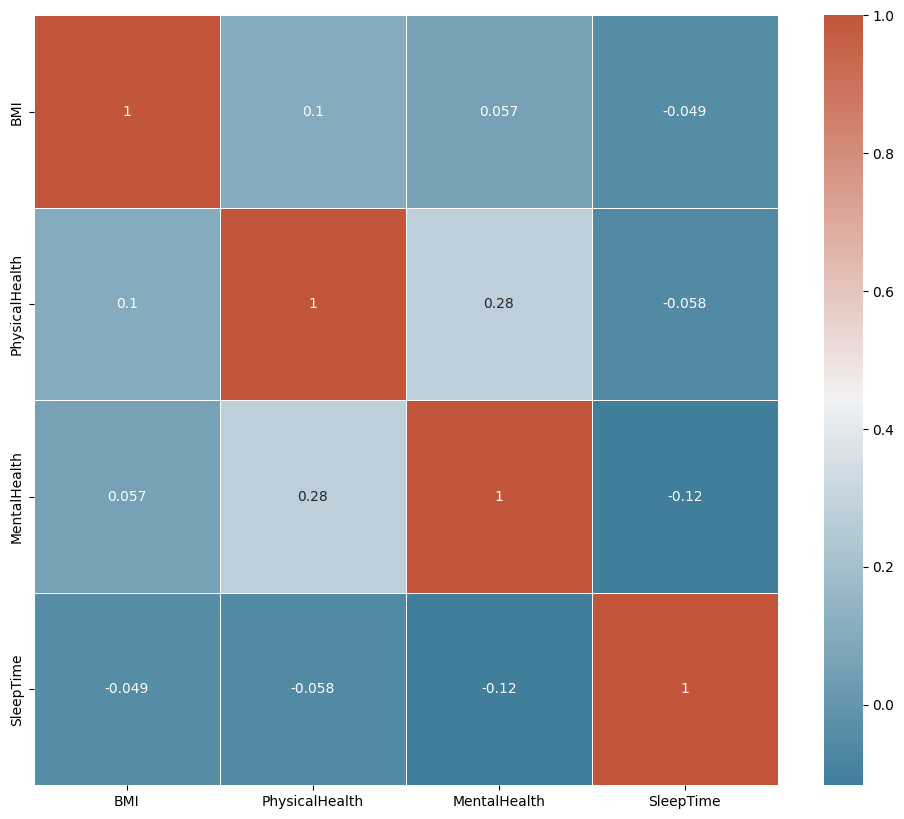

In [13]:
# Compute the correlation matrix for numerical features
corr = numerical_df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, cmap=cmap, linewidths=0.5)

Here we can see that the of the numerical attributes, besides PhysicalHealth and MentalHealth (with a slighly positive correlation), the other attributes have little to no correlation with each other.

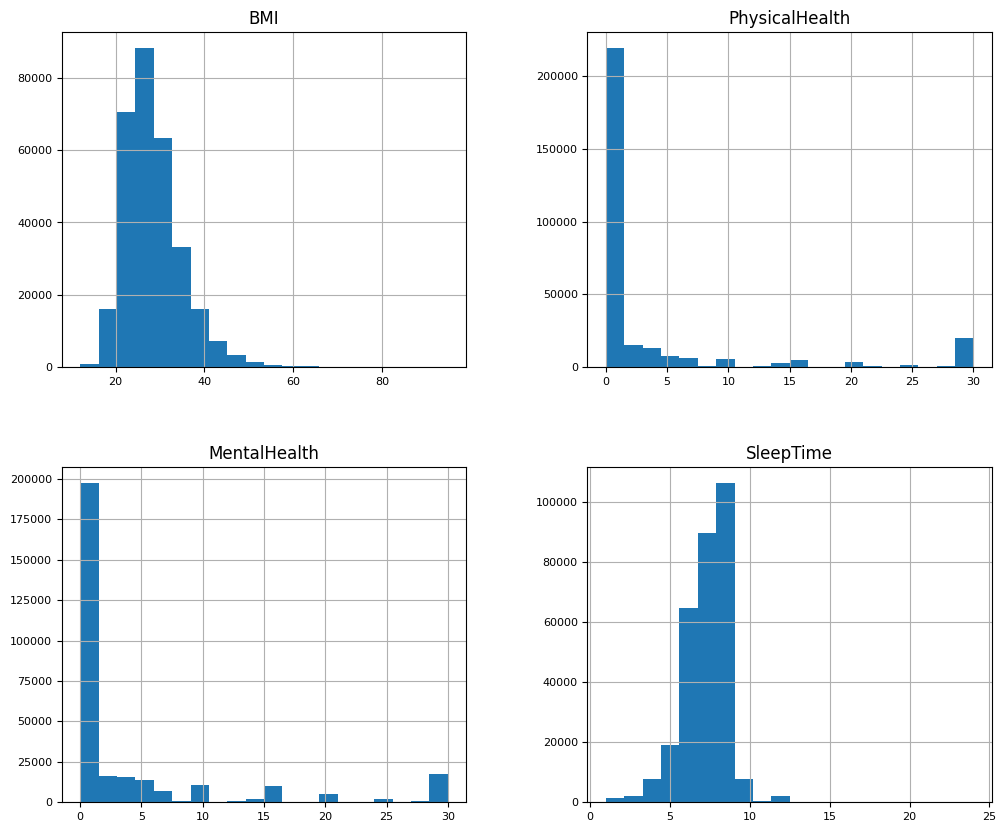

In [14]:
# Plot the distributions of the numerical features
numerical_df.hist(figsize=(12, 10), bins=20, xlabelsize=8, ylabelsize=8);

The distribution of MentalHealth and PhysicalHealth are strongly right skewed, BMI is slightly right skewed, and SleepTime is slightly left skewed.

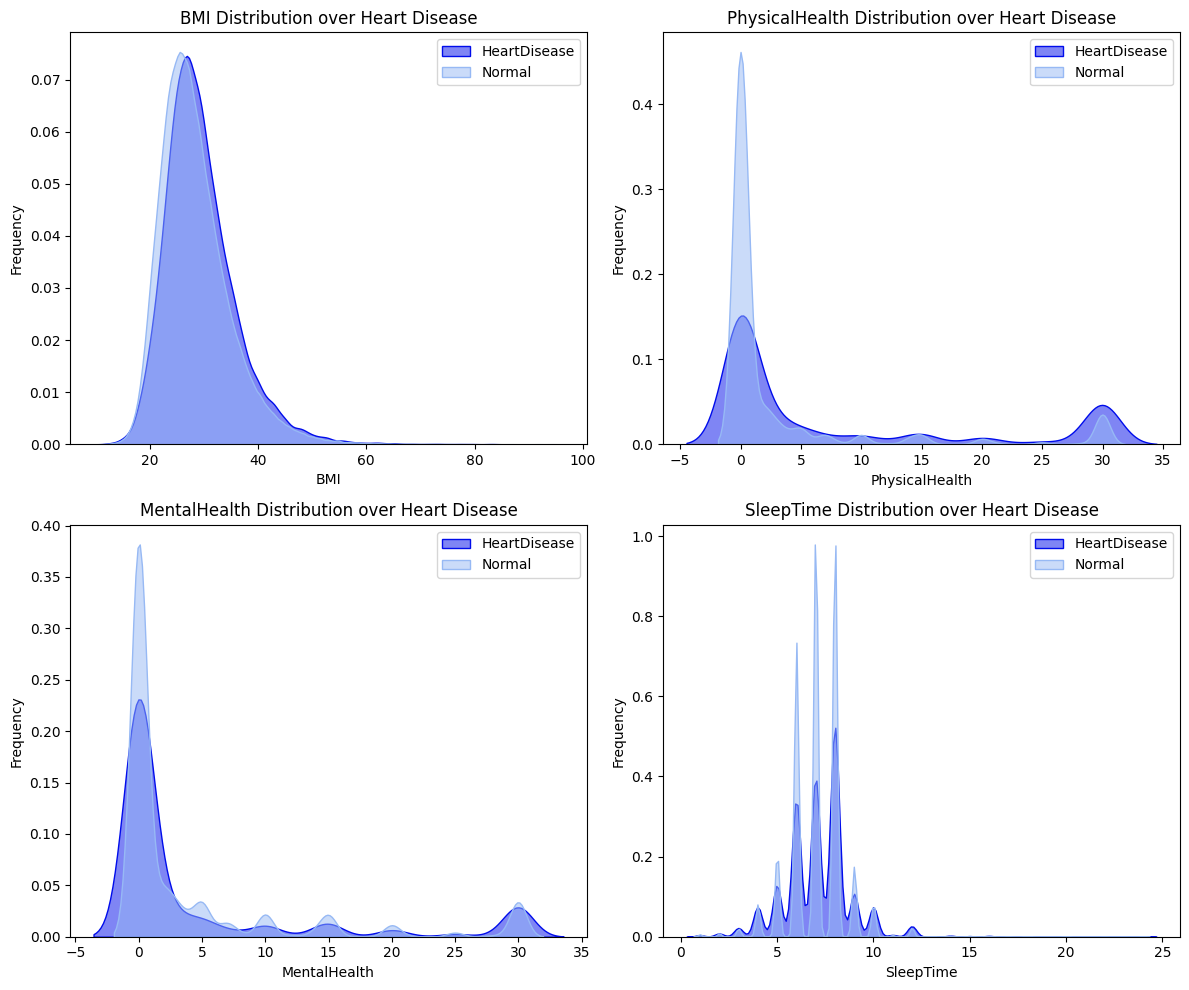

In [15]:
# Create subplots
fig, axes = plt.subplots(nrows=len(numerical_df.columns) // 2, ncols=2, figsize=(12, 10))

for idx, column in enumerate(numerical_df):
    # Get row and col index
    row_idx = idx // 2
    col_idx = idx % 2
    
    # Plot the frequency of HeartDisease
    # Make two plots, one for the distribution of people with HeartDisease and one for those without
    # alpha: visibility
    # fill: fills graph
    # color: the color of the plot
    # ax: selct the correct subplot
    sns.kdeplot(df[df["HeartDisease"] == "Yes"][column], alpha=0.5, fill=True, color="#000CEB", label="HeartDisease", ax=axes[row_idx, col_idx])
    sns.kdeplot(df[df["HeartDisease"] == "No"][column], alpha=0.5, fill=True, color="#97B9F4", label="Normal", ax=axes[row_idx, col_idx])
    
    # Labels and legends
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column} Distribution over Heart Disease")
    axes[row_idx, col_idx].legend()

# Plot!
plt.tight_layout()
plt.show()

On average BMI is slightly greater for individuals with heart disease. <br>
A high PhysicalHealth score has more occurences of HeartDisease.

# Outliers

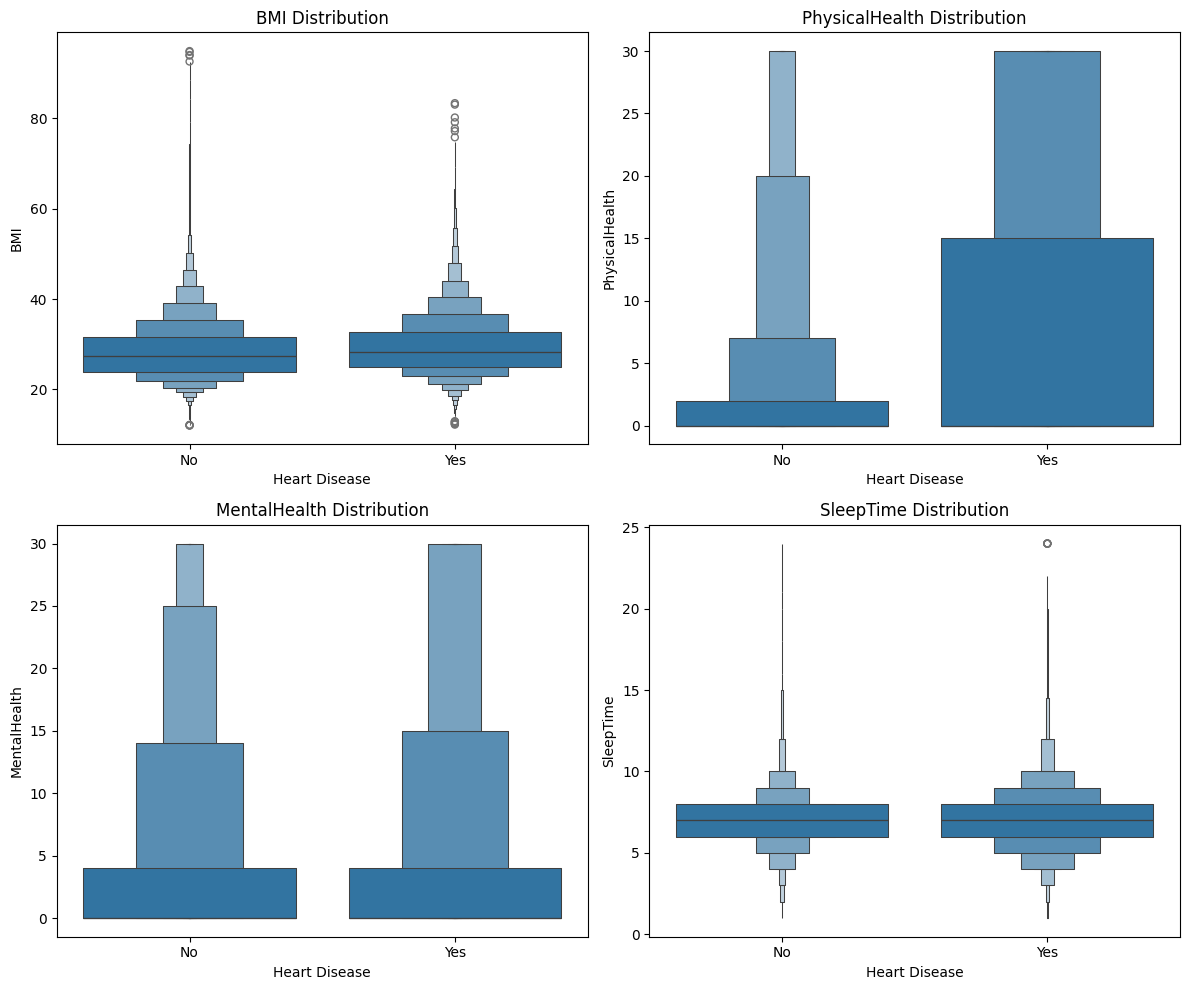

In [16]:
# Create the figure and subplots
fig, axes = plt.subplots(nrows=len(numerical_df.columns) // 2, ncols=2, figsize=(12, 10))

for idx, column in enumerate(numerical_df):
    # Get the row and col index
    row_idx = idx // 2
    col_idx = idx % 2
    
    # Create a enhanced boxplot
    sns.boxenplot(x="HeartDisease", y=column, data=df, ax=axes[row_idx, col_idx])
    
    axes[row_idx, col_idx].set_xlabel("Heart Disease")
    axes[row_idx, col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")

plt.tight_layout()
plt.show()

Only BMI has a significant amount of outliers. <br>
All the distributions have a similar shape, irregardless of HeartDisease.

In [17]:
# Drop the target
# We are using PCA for feature selection and want to prevent data leak
categorical_cols = categorical_cols.drop(['HeartDisease'])

# Logistic Regression Baseline

In [18]:
# Get X and y
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

# Split the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical features
for feature in categorical_cols:
    encoder = LabelEncoder()
    X_train[feature] = encoder.fit_transform(X_train[feature])
    X_test[feature] = encoder.fit_transform(X_test[feature])

# Scale the features
scaler = MinMaxScaler()
# Get the scaled values
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.92      0.99      0.95     54894
         Yes       0.51      0.09      0.15      5450

    accuracy                           0.91     60344
   macro avg       0.71      0.54      0.55     60344
weighted avg       0.88      0.91      0.88     60344

Accuracy 0.9099993371337664
[[54439   455]
 [ 4976   474]]


# Principle Component Analysis on Initial Categorical Features (Label Encoded)

In [19]:
# Get X and y
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

# Split the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical features
for feature in categorical_cols:
    encoder = LabelEncoder()
    X_train[feature] = encoder.fit_transform(X_train[feature])
    X_test[feature] = encoder.fit_transform(X_test[feature])

# Scale the features
scaler = MinMaxScaler()
# Get the scaled values
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# Initialize PCA and fit the data
pca = PCA()
pca.fit(X_train)

# Keep track of the total explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_)
# Check how many principle components are needs to preserve 90% of the variance
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


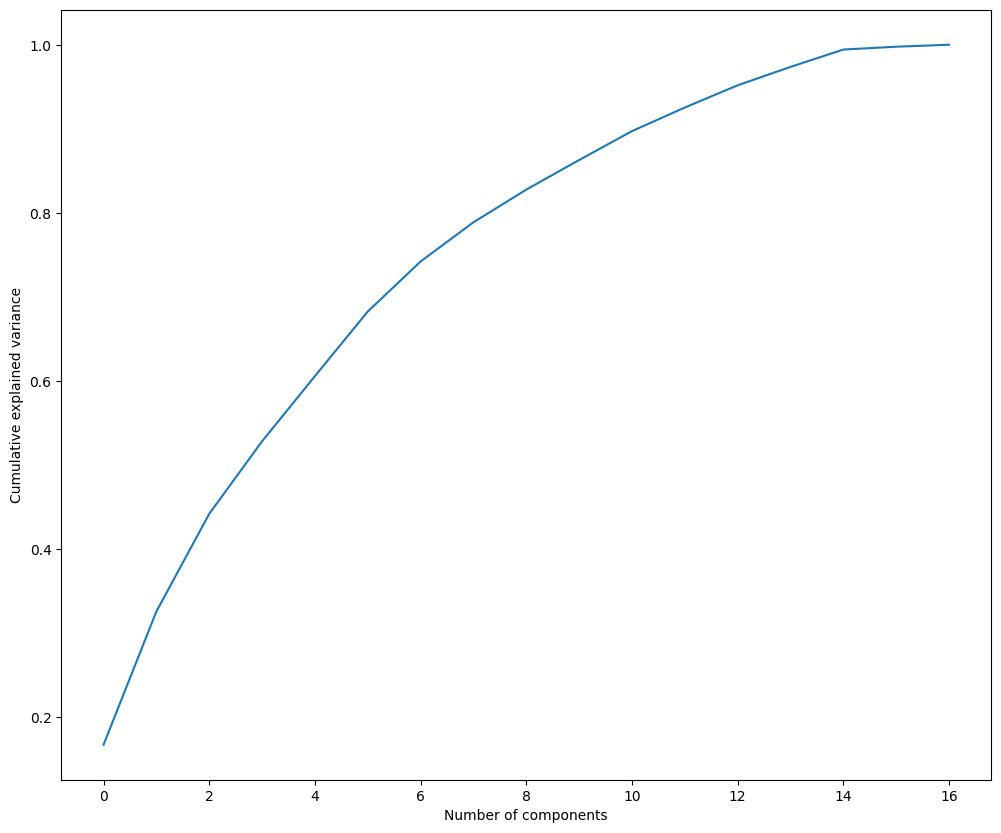

In [20]:
# Graph the cumulative explained variance
plt.figure(figsize=(12,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [21]:
# Get loadings for each component
components = pca.components_
loadings = pd.DataFrame(components, columns=X.columns)

# Print them out
for i, pc in enumerate(components):
    print(f'Principal Component {i+1} Loadings:')
    print(f'Explained Variance {pca.explained_variance_ratio_[i]}')
    print(loadings.iloc[i].sort_values(ascending=False))
    print('\n')

Principal Component 1 Loadings:
Explained Variance 0.1669488740708853
Smoking             0.800988
DiffWalking         0.290675
Sex                 0.252062
PhysicalHealth      0.179859
AgeCategory         0.161993
Diabetic            0.086509
MentalHealth        0.072274
Stroke              0.058234
SkinCancer          0.056906
KidneyDisease       0.047160
Asthma              0.042416
Race                0.038967
AlcoholDrinking     0.038227
BMI                 0.017495
SleepTime          -0.003392
GenHealth          -0.012315
PhysicalActivity   -0.353541
Name: 0, dtype: float64


Principal Component 2 Loadings:
Explained Variance 0.1585653630438251
DiffWalking         0.269171
PhysicalHealth      0.150965
Asthma              0.121655
AgeCategory         0.115070
MentalHealth        0.108246
Diabetic            0.069512
KidneyDisease       0.037666
Stroke              0.036068
SkinCancer          0.012233
BMI                 0.011811
SleepTime           0.000555
GenHealth          -0.

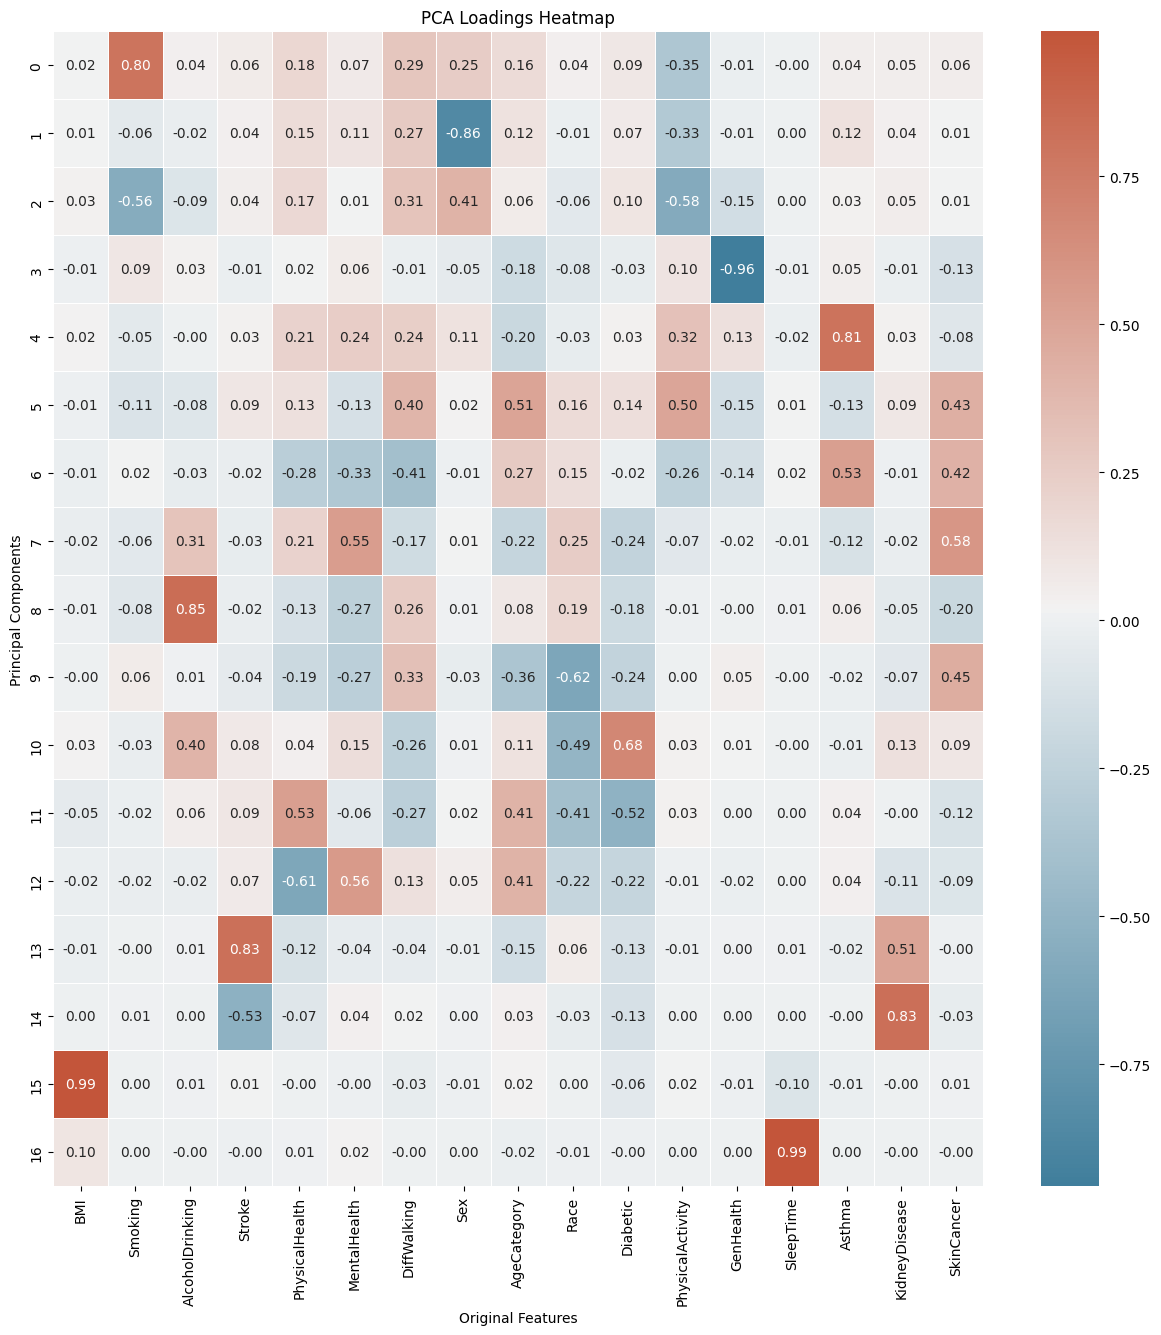

In [22]:
# Create a heatmap to vizulaize how the weight of each feature in each priciple component
fig = plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(loadings, cmap=cmap, fmt=".2f", annot=True, linewidths=.5)
plt.title('PCA Loadings Heatmap')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

# Logistic Regression using PCA (preserving 90% Variance)

In [23]:
# Get X and y
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

# Split the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical features
for feature in categorical_cols:
    encoder = LabelEncoder()
    X_train[feature] = encoder.fit_transform(X_train[feature])
    X_test[feature] = encoder.fit_transform(X_test[feature])

# Scale the features
scaler = MinMaxScaler()
# Get the scaled values
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

pca = PCA(n_components=12)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.92      0.99      0.95     54894
         Yes       0.45      0.10      0.17      5450

    accuracy                           0.91     60344
   macro avg       0.68      0.54      0.56     60344
weighted avg       0.87      0.91      0.88     60344

Accuracy 0.9074970171019489
[[54203   691]
 [ 4891   559]]


# Logistic Regression with One Hot Encoded Categorical Data

In [24]:
# Get X and y
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), categorical_cols)],
    remainder='passthrough')

X_transformed = preprocessor.fit_transform(X)
yn_mapping = {'Yes': 1, 'No': 0}
y_encoded = y.replace(yn_mapping)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
# Get the scaled values
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

C:\Users\andre\AppData\Local\Temp\ipykernel_21388\2570002383.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_encoded = y.replace(yn_mapping)


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54894
           1       0.53      0.10      0.17      5450

    accuracy                           0.91     60344
   macro avg       0.72      0.55      0.56     60344
weighted avg       0.88      0.91      0.88     60344

Accuracy 0.910827919925759
[[54393   501]
 [ 4880   570]]


# Target Distribution

([<matplotlib.patches.Wedge at 0x1fb8e88ade0>,
 [Text(-1.0559821726450649, 0.3080611157803087, '0'),
  Text(1.055982158223682, -0.30806116521440213, '1')],
 [Text(-0.5759902759882171, 0.16803333588016836, '90.96%'),
  Text(0.5759902681220083, -0.16803336284421933, '9.04%')])

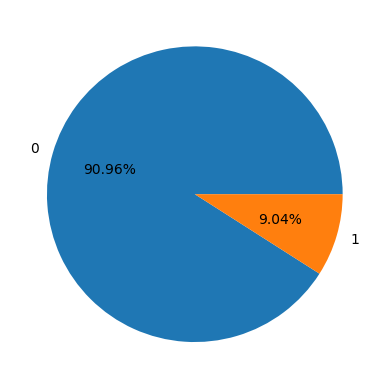

In [25]:
plt.pie(df['HeartDisease'].value_counts(), labels=[0, 1], autopct='%.2f%%')

# Resampling to Fix Target Distribution Imbalance
1. Make sure to split data into train and test sets before upsampling <br>
If we don't do this we could have data leakage. <br>

2. Test on a non-upsampled dataset. <br>
This gives a more realistic estimate of your model accuracy.

# Original Distribution

In [26]:
# Get X and y
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), categorical_cols)],
    remainder='passthrough')

X_transformed = preprocessor.fit_transform(X)
col_names = np.concatenate((preprocessor.transformers_[0][1].get_feature_names_out(), np.array(["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"])))
X_transformed = pd.DataFrame(X_transformed, columns=col_names)

yn_mapping = {'Yes': 1, 'No': 0}
y_encoded = pd.DataFrame(y.replace(yn_mapping), columns=['HeartDisease'])

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=42)

print(y_train['HeartDisease'].value_counts())

HeartDisease
0    219562
1     21811
Name: count, dtype: int64


C:\Users\andre\AppData\Local\Temp\ipykernel_21388\390718507.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_encoded = pd.DataFrame(y.replace(yn_mapping), columns=['HeartDisease'])


# Resampling

In [27]:
over = SMOTE(sampling_strategy=1)
under = RandomUnderSampler(sampling_strategy=0.1)

print(X_train.shape, y_train.shape)
print(y_train['HeartDisease'].value_counts())

X_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)
print(X_train_resampled.shape, y_train_resampled.shape)
print(y_train_resampled['HeartDisease'].value_counts())

X_train_resampled, y_train_resampled = under.fit_resample(X_train, y_train)
print(X_train_resampled.shape, y_train_resampled.shape)
print(y_train_resampled['HeartDisease'].value_counts())

# Scale the features
scaler = MinMaxScaler()
# Get the scaled values
X_train = scaler.fit_transform(X_train_resampled)
X_test = scaler.fit_transform(X_test)

(241373, 50) (241373, 1)
HeartDisease
0    219562
1     21811
Name: count, dtype: int64
(439124, 50) (439124, 1)
HeartDisease
0    219562
1    219562
Name: count, dtype: int64
(239921, 50) (239921, 1)
HeartDisease
0    218110
1     21811
Name: count, dtype: int64


# Logistic Regression using Resampled Data

In [33]:
model = LogisticRegression(max_iter=1000)
y = np.array(y_train_resampled).reshape(-1,)
model.fit(X_train_resampled, y)

X_test = pd.DataFrame(X_test, columns=col_names)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54894
           1       0.54      0.08      0.15      5450

    accuracy                           0.91     60344
   macro avg       0.73      0.54      0.55     60344
weighted avg       0.88      0.91      0.88     60344

Accuracy 0.910927349860798
[[54506   388]
 [ 4987   463]]


# Random Forest using Resampled Data

In [34]:
model = RandomForestClassifier(n_estimators=20)
y = np.array(y_train_resampled).reshape(-1,)
model.fit(X_train_resampled, y)

X_test = pd.DataFrame(X_test, columns=col_names)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     54894
           1       0.32      0.13      0.18      5450

    accuracy                           0.90     60344
   macro avg       0.62      0.55      0.56     60344
weighted avg       0.86      0.90      0.88     60344

Accuracy 0.8970900172345221
[[53441  1453]
 [ 4757   693]]
